In [325]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import train_test_split

(500, 2) (500, 1)
(499, 2) (1, 2) (499, 1) (1, 1)


/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


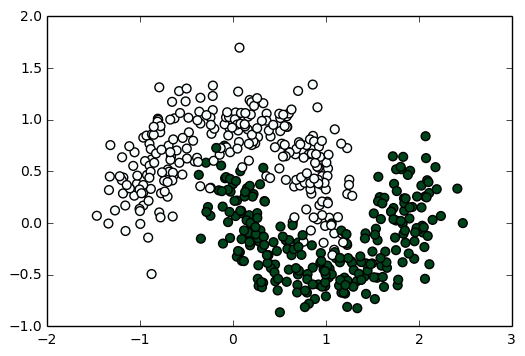

In [326]:
data = pd.read_csv("https://raw.githubusercontent.com/ml6973/Course/master/code/data/intro_to_ann.csv")
X, y = np.array(data.ix[:,0:2]), np.array(data.ix[:,2:3])
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.BuGn)

In [327]:
epochs = 1000
learning_rate = 0.01
hl_nodes = 5
num_features = 2
num_output = 1

In [328]:
x = tf.placeholder(tf.float32, [None, num_features])
y_ = tf.placeholder(tf.float32, [None, num_output])

# Create model
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with sigmoid activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.softmax(layer_1)
    # Output layer with sigmoid activation
    out_layer = tf.matmul(layer_1, weights['out']) + biases['out']
    out_layer = tf.nn.sigmoid(out_layer)
    return out_layer

In [329]:
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([num_features, hl_nodes])),
    'out': tf.Variable(tf.random_normal([hl_nodes, num_output]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([hl_nodes])),
    'out': tf.Variable(tf.random_normal([num_output]))
}

# Construct model
pred = multilayer_perceptron(x, weights, biases)


In [330]:
# Define loss and optimizer
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(pred), reduction_indices=[1]))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

# Initializing the variables
init = tf.initialize_all_variables()

In [331]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    for i in range(epochs):
        sess.run([optimizer], feed_dict={x: X_train, y_: y_train})
        print(sess.run([cross_entropy], feed_dict={x: X_train, y_: y_train}))

[0.25093549]
[0.25038719]
[0.24984089]
[0.24929652]
[0.24875408]
[0.24821357]
[0.24767502]
[0.24713837]
[0.24660362]
[0.24607077]
[0.24553977]
[0.2450107]
[0.2444835]
[0.24395816]
[0.2434347]
[0.24291307]
[0.2423933]
[0.24187531]
[0.24135917]
[0.2408448]
[0.24033231]
[0.2398216]
[0.23931266]
[0.23880547]
[0.23830013]
[0.23779652]
[0.23729463]
[0.23679456]
[0.23629619]
[0.23579955]
[0.23530468]
[0.2348115]
[0.23432006]
[0.23383027]
[0.23334222]
[0.23285584]
[0.23237115]
[0.23188813]
[0.23140673]
[0.23092709]
[0.23044902]
[0.22997266]
[0.22949788]
[0.22902475]
[0.22855325]
[0.22808336]
[0.22761509]
[0.2271484]
[0.22668332]
[0.22621979]
[0.22575787]
[0.22529756]
[0.22483876]
[0.22438155]
[0.22392586]
[0.22347176]
[0.22301914]
[0.22256812]
[0.22211859]
[0.22167057]
[0.22122407]
[0.22077911]
[0.22033562]
[0.21989362]
[0.2194531]
[0.21901405]
[0.21857651]
[0.21814041]
[0.21770577]
[0.21727262]
[0.21684086]
[0.21641059]
[0.21598174]
[0.2155543]
[0.2151283]
[0.21470368]
[0.21428053]
[0.2138588